In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import torch.optim as optim
from torch.utils.data import Dataset
from PIL import Image
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore")

import glob

from sklearn.model_selection import train_test_split

In [7]:
masks = glob.glob("Dataset_BUSI_with_GT/*/*_mask.png")

In [8]:
masks[1:4]

['Dataset_BUSI_with_GT\\benign\\benign (10)_mask.png',
 'Dataset_BUSI_with_GT\\benign\\benign (100)_mask.png',
 'Dataset_BUSI_with_GT\\benign\\benign (101)_mask.png']

In [9]:
images = [mask_images.replace("_mask", "") for mask_images in masks]

In [10]:
series = list(zip(images, masks))

In [11]:
series[:4]

[('Dataset_BUSI_with_GT\\benign\\benign (1).png',
  'Dataset_BUSI_with_GT\\benign\\benign (1)_mask.png'),
 ('Dataset_BUSI_with_GT\\benign\\benign (10).png',
  'Dataset_BUSI_with_GT\\benign\\benign (10)_mask.png'),
 ('Dataset_BUSI_with_GT\\benign\\benign (100).png',
  'Dataset_BUSI_with_GT\\benign\\benign (100)_mask.png'),
 ('Dataset_BUSI_with_GT\\benign\\benign (101).png',
  'Dataset_BUSI_with_GT\\benign\\benign (101)_mask.png')]

In [12]:
len(series)

780

In [13]:
def plot_train_labels(image_mask):
    image = cv2.imread(image_mask[0])
    mask = cv2.imread(image_mask[1])
    
    _, axarr = plt.subplots(1, 3, figsize=(5, 5))
    
    axarr[0].imshow(np.squeeze(image), cmap='gray', origin='lower')
    axarr[0].set_ylabel('Axial View', fontsize=14)
    axarr[0].set_xticks([])
    axarr[0].set_yticks([])
    axarr[0].set_title('CT', fontsize=14)

    axarr[1].imshow(np.squeeze(mask), cmap='jet', origin='lower')
    axarr[1].axis('off')
    axarr[1].set_title('Mask', fontsize=14)

    axarr[2].imshow(np.squeeze(image), cmap='gray', alpha=1, origin='lower')
    axarr[2].imshow(np.squeeze(mask), cmap='jet', alpha=0.5, origin='lower')
    axarr[2].axis('off')
    axarr[2].set_title('Overlay', fontsize=14)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

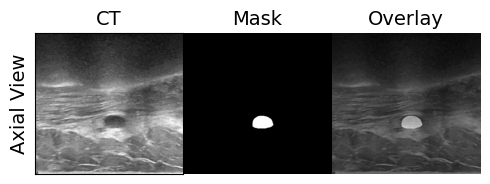

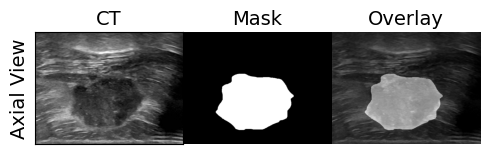

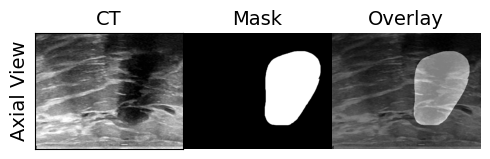

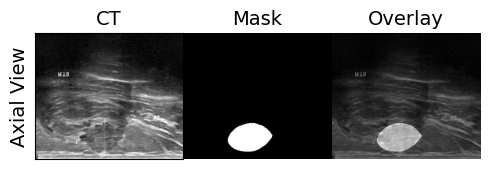

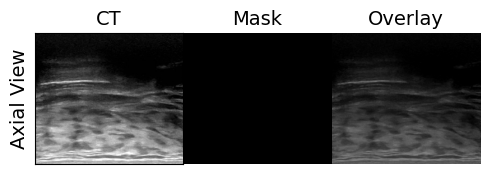

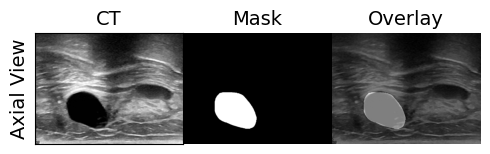

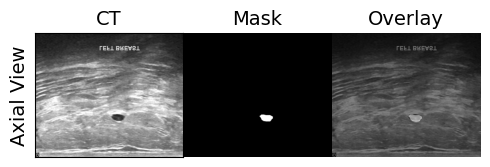

In [14]:
random_image = random.sample(range(750), 7)
for image in random_image:
    plot_train_labels(series[image])

In [15]:
dataset = pd.DataFrame(series, columns = ['image_path', 'mask_path'])

In [16]:
dataset

,image_path,mask_path
0,Dataset_BUSI_with_GT\benign\benign (1).png,Dataset_BUSI_with_GT\benign\benign (1)_mask.png
1,Dataset_BUSI_with_GT\benign\benign (10).png,Dataset_BUSI_with_GT\benign\benign (10)_mask.png
2,Dataset_BUSI_with_GT\benign\benign (100).png,Dataset_BUSI_with_GT\benign\benign (100)_mask.png
3,Dataset_BUSI_with_GT\benign\benign (101).png,Dataset_BUSI_with_GT\benign\benign (101)_mask.png
4,Dataset_BUSI_with_GT\benign\benign (102).png,Dataset_BUSI_with_GT\benign\benign (102)_mask.png
...,...,...
775,Dataset_BUSI_with_GT\normal\normal (95).png,Dataset_BUSI_with_GT\normal\normal (95)_mask.png
776,Dataset_BUSI_with_GT\normal\normal (96).png,Dataset_BUSI_with_GT\normal\normal (96)_mask.png
777,Dataset_BUSI_with_GT\normal\normal (97).png,Dataset_BUSI_with_GT\normal\normal (97)_mask.png
778,Dataset_BUSI_with_GT\normal\normal (98).png,Dataset_BUSI_with_GT\normal\normal (98)_mask.png


In [17]:
train, test= train_test_split(dataset, test_size=0.25)

In [18]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (585, 2)
Test shape: (195, 2)


In [19]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class CustomImageMaskDataset(Dataset):
    np.random.seed(42)
    torch.manual_seed(42)
    def __init__(self, dataframe, image_transform = None):
        self.data = dataframe
        self.image_transform = image_transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image_path = self.data.iloc[idx]['image_path']
        mask_path = self.data.iloc[idx]['mask_path']
        image = Image.open(image_path).convert('L')
        mask = Image.open(mask_path).convert('L')
        
        if self.image_transform:
            image = self.image_transform(image)
            mask = self.image_transform(mask)
            
        return image, mask
    
image_size = 128
train_transforms = transforms.Compose([
    transforms.Resize([image_size, image_size]),
    transforms.ToTensor(),
])
val_transforms = transforms.Compose([
    transforms.Resize([image_size, image_size]),
    transforms.ToTensor(),
])


train_dataset = CustomImageMaskDataset(train, train_transforms)
test_dataset = CustomImageMaskDataset(test, val_transforms)

batch_size = 16
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [20]:
for batch in train_dataloader:
    # Assuming your dataset returns a tuple (inputs, targets)
    inputs, targets = batch
    
    # Print the shapes
    print("Input shape:", inputs.shape)
    print("Target shape:", targets.shape)
    break

Input shape: torch.Size([16, 1, 128, 128])
Target shape: torch.Size([16, 1, 128, 128])


In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [22]:
device

device(type='cpu')

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        
        # Encoding path (contracting)
        self.enc1 = self.conv_block(1, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)
        
        # Bottleneck
        self.bottleneck = self.conv_block(512, 1024)
        
        # Decoding path (expanding)
        self.upconv4 = self.upconv(1024, 512)
        self.dec4 = self.conv_block(1024, 512)
        
        self.upconv3 = self.upconv(512, 256)
        self.dec3 = self.conv_block(512, 256)
        
        self.upconv2 = self.upconv(256, 128)
        self.dec2 = self.conv_block(256, 128)
        
        self.upconv1 = self.upconv(128, 64)
        self.dec1 = self.conv_block(128, 64)
        
        # Output layer (1 output channel)
        self.out_conv = nn.Conv2d(64, 1, kernel_size=1)
    
    def conv_block(self, in_channels, out_channels):
        """Block of 2 convolution layers followed by ReLU activation"""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def upconv(self, in_channels, out_channels):
        """Upsampling layer"""
        return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
    
    def forward(self, x):
        # Encoding path
        e1 = self.enc1(x)   # 1st block
        e2 = self.enc2(F.max_pool2d(e1, 2))   # 2nd block
        e3 = self.enc3(F.max_pool2d(e2, 2))   # 3rd block
        e4 = self.enc4(F.max_pool2d(e3, 2))   # 4th block

        # Bottleneck
        b = self.bottleneck(F.max_pool2d(e4, 2))

        # Decoding path
        d4 = self.upconv4(b)
        d4 = torch.cat((e4, d4), dim=1)
        d4 = self.dec4(d4)

        d3 = self.upconv3(d4)
        d3 = torch.cat((e3, d3), dim=1)
        d3 = self.dec3(d3)

        d2 = self.upconv2(d3)
        d2 = torch.cat((e2, d2), dim=1)
        d2 = self.dec2(d2)

        d1 = self.upconv1(d2)
        d1 = torch.cat((e1, d1), dim=1)
        d1 = self.dec1(d1)

        # Output layer with sigmoid activation
        out = self.out_conv(d1)
        out = torch.sigmoid(out)  # Sigmoid activation to get values between 0 and 1
        return out


# Instantiate the model and check its output shape
model = UNet()
x = torch.randn(1, 1, 128, 128)  # Example input: batch size = 1, 1 input channel, image size 572x572
output = model(x)
print(output.shape)  # Should be [1, 1, H, W] depending on the input size (matching the input spatial dimensions)


torch.Size([1, 1, 128, 128])


In [24]:
class Trainer:
    def __init__(self, model, num_epochs, optimizer, criterion, device):
        self.num_epochs = num_epochs
        self.optimizer = optimizer
        self.criterion = criterion
        self.model = model
        self.device = device
        self.log_interval = 15

        # Lists to store training and validation metrics
        self.train_losses = []
        self.val_losses = []
        self.train_dices = []
        self.val_dices = []

        # Best model and its metrics
        self.best_model = None
        self.best_dice = 0.0
        self.best_epoch = 0
        
    def dice_coeff(self, predicted, target, smooth=1e-5):
        intersection = torch.sum(predicted * target)
        union = torch.sum(predicted) + torch.sum(target)
        dice = (2. * intersection + smooth) / (union + smooth)
        return dice
    
    def iou(self, pred_mask, true_mask):
        intersection = torch.logical_and(pred_mask, true_mask).sum().item()
        union = torch.logical_or(pred_mask, true_mask).sum().item()
        iou_score = intersection / union if union != 0 else 0.0
        return iou_score
    
    def save_best_model(self, epoch, dice):
        if dice > self.best_dice:
            self.best_dice = dice
            self.best_epoch = epoch
            self.best_model = self.model.state_dict()

            filename = f'best_model_epoch{epoch}_dice{dice:.4f}.pth'
            torch.save(self.best_model, filename)
            
            
    def train(self, train_loader, val_loader):
        for epoch in range(self.num_epochs):
            train_loss = 0.0
            val_loss = 0.0
            train_dice = 0.0
            val_dice = 0.0

            # Training loop
            for i, (images, masks) in enumerate(train_loader):
                images, masks = images.to(self.device), masks.to(self.device)

                self.model.train()
                self.optimizer.zero_grad()

                outputs = self.model(images)
                loss = self.criterion(outputs, masks)
                dice = self.dice_coeff(outputs, masks)

                loss.backward()
                self.optimizer.step()

                train_loss += loss.item()
                train_dice += dice

                if (i + 1) % self.log_interval == 0:
                    print(f'Epoch [{epoch + 1}/{self.num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}, Dice Coef: {dice:.4f}')

            # Validation loop
            self.model.eval()
            with torch.no_grad():
                for images, masks in val_loader:
                    images, masks = images.to(self.device), masks.to(self.device)
                    outputs = self.model(images)
                    val_loss += self.criterion(outputs, masks).item()
                    val_dice += self.dice_coeff(outputs, masks)

            avg_train_loss = train_loss / len(train_loader)
            avg_val_loss = val_loss / len(val_loader)
            avg_train_dice = train_dice / len(train_loader)
            avg_val_dice = val_dice / len(val_loader)

            print(f'Epoch [{epoch + 1}/{self.num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
            print(f'Epoch [{epoch + 1}/{self.num_epochs}], Train Dice: {avg_train_dice:.4f}, Val Dice: {avg_val_dice:.4f}')

            # Save metrics
            self.train_losses.append(avg_train_loss)
            self.val_losses.append(avg_val_loss)
            self.train_dices.append(avg_train_dice)
            self.val_dices.append(avg_val_dice)

            # Save best model
            self.save_best_model(epoch + 1, avg_val_dice)
    def get_metrics(self):
        return {
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
            'train_dices': self.train_dices,
            'val_dices': self.val_dices,
            'best_model': self.best_model,
            'best_dice': self.best_dice,
            'best_epoch': self.best_epoch
        }

In [25]:
def dice_coef_loss(inputs, target):
    smooth = 1e-6
    intersection = 2.0 * (target*inputs).sum() + smooth
    union = target.sum() + inputs.sum() + smooth
    return 1 - (intersection/union)

def bce_dice_loss(inputs, target):
    dice_score = dice_coef_loss(inputs, target)
    bce_loss = nn.BCELoss()
    bce_score = bce_loss(inputs, target)
    
    return bce_score + dice_score

In [26]:
unet = UNet().to(device)

In [27]:
learning_rate = 0.0001
weight_decay = 1e-6  # Regularization term to prevent overfitting

optimizer = optim.Adam(unet.parameters(), lr=learning_rate, weight_decay=weight_decay)

trainer = Trainer(model=unet, num_epochs=100, optimizer=optimizer, criterion=bce_dice_loss, device=device)

In [28]:
trainer.train(train_dataloader, test_dataloader)
metrics = trainer.get_metrics()

Epoch [1/100], Step [15/37], Loss: 1.3772, Dice Coef: 0.1812
Epoch [1/100], Step [30/37], Loss: 1.4598, Dice Coef: 0.1137
Epoch [1/100], Train Loss: 1.3530, Val Loss: 1.3099
Epoch [1/100], Train Dice: 0.2013, Val Dice: 0.2028
Epoch [2/100], Step [15/37], Loss: 1.1025, Dice Coef: 0.2678
Epoch [2/100], Step [30/37], Loss: 0.9649, Dice Coef: 0.3656
Epoch [2/100], Train Loss: 1.1132, Val Loss: 1.0432
Epoch [2/100], Train Dice: 0.2706, Val Dice: 0.2652
Epoch [3/100], Step [15/37], Loss: 1.0789, Dice Coef: 0.2740
Epoch [3/100], Step [30/37], Loss: 0.9660, Dice Coef: 0.3619
Epoch [3/100], Train Loss: 1.0291, Val Loss: 1.0401
Epoch [3/100], Train Dice: 0.3067, Val Dice: 0.2876
Epoch [4/100], Step [15/37], Loss: 1.2437, Dice Coef: 0.1612
Epoch [4/100], Step [30/37], Loss: 1.1351, Dice Coef: 0.2375
Epoch [4/100], Train Loss: 0.9918, Val Loss: 1.0315
Epoch [4/100], Train Dice: 0.3193, Val Dice: 0.2732
Epoch [5/100], Step [15/37], Loss: 0.9441, Dice Coef: 0.3300
Epoch [5/100], Step [30/37], Loss: 

KeyboardInterrupt: 

In [1]:
def to_numpy(tensor):
    # Move tensor to CPU and convert to NumPy array
    return tensor.cpu().detach().item()

def plot_metrics(metrics):
    num_epochs = len(metrics['train_losses'])
    epochs = np.arange(1, num_epochs + 1)

    # Convert tensors to NumPy arrays
    train_losses_np = metrics['train_losses']
    val_losses_np = metrics['val_losses']
    train_dices_np = [to_numpy(dice) for dice in metrics['train_dices']]
    val_dices_np = [to_numpy(dice) for dice in metrics['val_dices']]

    # Plot Losses
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses_np, label='Train Loss')
    plt.plot(epochs, val_losses_np, label='Val Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Dice Coefficients
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_dices_np, label='Train Dice')
    plt.plot(epochs, val_dices_np, label='Val Dice')
    plt.title('Training and Validation Dice Coefficients')
    plt.xlabel('Epoch')
    plt.ylabel('Dice Coefficient')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(metrics)


NameError: name 'metrics' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def to_numpy(tensor):
    # Move tensor to CPU and convert to NumPy array
    return tensor.cpu().detach().numpy()

def threshold_prediction(predicted, threshold=0.5):
    # Threshold predicted values
    predicted[predicted < threshold] = 0
    predicted[predicted >= threshold] = 1
    return predicted

def plot_subplots(image, mask, predicted, threshold=0.5):
    # Convert tensors to NumPy arrays
    image_np, mask_np, predicted_np = map(to_numpy, (image, mask, predicted))

    # Threshold the predicted values
    predicted_np_thresholded = threshold_prediction(predicted_np, threshold)

    fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # Adjust figsize as needed

    # Plot Image, Mask, Predicted, and Thresholded Predicted
    titles = ['Image', 'Mask', 'Predicted']
    for ax, data, title in zip(axes, [image_np, mask_np, predicted_np, predicted_np_thresholded], titles):
        ax.imshow(data.squeeze(), cmap='gray' if 'Mask' in title else 'gray')
        ax.set_title(title)
        ax.axis('off')

    plt.show()

In [ ]:
for i in [2, 3, 11, 20, 55, 67, 87, 98, 120, 130, 200, 99]:
    image = train_dataset[i][0]
    mask = train_dataset[i][1]
    im = image.to(device)
    pred = unet(im.unsqueeze(0))
    pred = pred.squeeze()

    plot_subplots(im, mask, pred)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.enc1 = self.double_conv(n_channels, 64)
        self.enc2 = self.double_conv(64, 128)
        self.enc3 = self.double_conv(128, 256)
        self.enc4 = self.double_conv(256, 512)

        self.bottleneck = self.double_conv(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.double_conv(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.double_conv(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.double_conv(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.double_conv(128, 64)

        self.out_conv = nn.Conv2d(64, n_classes, kernel_size=1)

    def double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x1 = self.enc1(x)
        x2 = self.enc2(F.max_pool2d(x1, 2))
        x3 = self.enc3(F.max_pool2d(x2, 2))
        x4 = self.enc4(F.max_pool2d(x3, 2))

        x_bottleneck = self.bottleneck(F.max_pool2d(x4, 2))

        x = self.upconv4(x_bottleneck)
        x = self.dec4(torch.cat([x4, x], dim=1))
        x = self.upconv3(x)
        x = self.dec3(torch.cat([x3, x], dim=1))
        x = self.upconv2(x)
        x = self.dec2(torch.cat([x2, x], dim=1))
        x = self.upconv1(x)
        x = self.dec1(torch.cat([x1, x], dim=1))
        logits = self.out_conv(x)
        return logits

# Initialize the UNet model
model = UNet(n_channels=1, n_classes=1)

# Load the pre-trained weights
model.load_state_dict(torch.load('best_model_epoch88_dice0.7369.pth', map_location=torch.device('cpu')))
model.eval()

print("Model loaded successfully!")


C:\Users\shash\AppData\Local\Temp\ipykernel_41328\440142112.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_epoch88_dice0.7

Model loaded successfully!


In [ ]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
import random

# Preprocess the input image
def preprocess_image(image_path):
    """
    Preprocess the input image to match the model's training setup.
    """
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    preprocess = transforms.Compose([
        transforms.Resize((128, 128)),  # Match the model input size
        transforms.ToTensor(),          # Convert to tensor
        transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize (if applied during training)
    ])
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension
    return image_tensor, image

# Predict the mask
def predict_mask(model, image_tensor):
    """
    Predict the mask using the trained model.
    """
    with torch.no_grad():
        output = model(image_tensor)
        predicted_mask = torch.sigmoid(output).squeeze(0).cpu().numpy()
    return predicted_mask

# Visualize original, original mask, and predicted mask
def visualize_results(original_image, original_mask, predicted_mask):
    """
    Visualize the original image, original mask, and predicted mask side by side.
    """
    fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

    # Original Image
    axarr[0].imshow(original_image, cmap='gray')
    axarr[0].set_title("Original Image")
    axarr[0].axis('off')

    # Original Mask
    axarr[1].imshow(original_mask, cmap='gray')
    axarr[1].set_title("Original Mask")
    axarr[1].axis('off')

    # Predicted Mask
    axarr[2].imshow(predicted_mask.squeeze(), cmap='gray')
    axarr[2].set_title("Predicted Mask")
    axarr[2].axis('off')

    plt.tight_layout()
    plt.show()

# Load the trained model
model = UNet(n_channels=1, n_classes=1)  # Ensure your UNet architecture matches
model.load_state_dict(torch.load('best_model_epoch88_dice0.7369.pth', map_location=torch.device('cpu')))
model.eval()

# Define the base path for images and masks
base_image_path = "Dataset_BUSI_with_GT/benign/benign ({}).png"
base_mask_path = "Dataset_BUSI_with_GT/benign/benign ({})_mask.png"

# Generate 5 random image numbers
random_numbers = random.sample(range(1, 100), 5)  # Adjust range based on your dataset

# Process and visualize for each random image
for number in random_numbers:
    image_path = base_image_path.format(number)
    mask_path = base_mask_path.format(number)

    # Preprocess the image
    image_tensor, original_image = preprocess_image(image_path)

    # Load the original mask
    original_mask = Image.open(mask_path).convert('L')
    original_mask = original_mask.resize((128, 128))  # Resize to match model prediction

    # Predict the mask
    predicted_mask = predict_mask(model, image_tensor)

    # Visualize results
    visualize_results(original_image, original_mask, predicted_mask)


In [ ]:
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
class BUSDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.image_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.png') and '_mask' not in f])
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Get image and corresponding mask paths
        image_file = self.image_files[idx]
        mask_file = image_file.replace('.png', '_mask.png')

        image_path = os.path.join(self.data_dir, image_file)
        mask_path = os.path.join(self.data_dir, mask_file)

        # Load image and mask
        image = Image.open(image_path).convert('L')
        mask = Image.open(mask_path).convert('L')

        # Apply transformations
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Transformations to resize and normalize images and masks
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Match input size for the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize between -1 and 1
])

# Initialize dataset and data loader
data_dir = "Dataset_BUSI_with_GT/benign"  # Adjust path to your data
dataset = BUSDataset(data_dir, transform=transform)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)  # Adjust batch size as needed


In [ ]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.enc1 = self.double_conv(n_channels, 64)
        self.enc2 = self.double_conv(64, 128)
        self.enc3 = self.double_conv(128, 256)
        self.enc4 = self.double_conv(256, 512)

        self.bottleneck = self.double_conv(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.double_conv(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.double_conv(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.double_conv(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.double_conv(128, 64)

        self.out_conv = nn.Conv2d(64, n_classes, kernel_size=1)

    def double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x1 = self.enc1(x)
        x2 = self.enc2(nn.MaxPool2d(2)(x1))
        x3 = self.enc3(nn.MaxPool2d(2)(x2))
        x4 = self.enc4(nn.MaxPool2d(2)(x3))

        x_bottleneck = self.bottleneck(nn.MaxPool2d(2)(x4))

        x = self.upconv4(x_bottleneck)
        x = self.dec4(torch.cat([x4, x], dim=1))
        x = self.upconv3(x)
        x = self.dec3(torch.cat([x3, x], dim=1))
        x = self.upconv2(x)
        x = self.dec2(torch.cat([x2, x], dim=1))
        x = self.upconv1(x)
        x = self.dec1(torch.cat([x1, x], dim=1))
        logits = self.out_conv(x)
        return logits


In [ ]:
def dice_loss(pred, target, smooth=1e-5):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    return 1 - (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

criterion = nn.BCEWithLogitsLoss()  # Combines sigmoid and binary cross-entropy


In [ ]:
# Initialize model, optimizer, and device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes=1).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    dice_score = 0

    for images, masks in tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, masks = images.to(device), masks.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks) + dice_loss(torch.sigmoid(outputs), masks)
        epoch_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate Dice Coefficient
        preds = torch.sigmoid(outputs) > 0.5
        dice_score += 1 - dice_loss(preds.float(), masks.float())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Dice Score: {dice_score/len(data_loader):.4f}")


In [ ]:

# Visualize predictions during training
model.eval()
with torch.no_grad():
    for images, masks in data_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)
        preds = torch.sigmoid(outputs) > 0.5

        # Visualize the first batch
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(images[0].cpu().squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title("Original Mask")
        plt.imshow(masks[0].cpu().squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask")
        plt.imshow(preds[0].cpu().squeeze(), cmap='gray')
        plt.axis('off')

        plt.show()
        break  # Visualize one batch


In [ ]:
torch.save(model.state_dict(), "dynamic_training_model.pth")
